In [19]:
!pip install scikit-learn

In [20]:
# Import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [22]:
# Import datasets
path=r'/Users/elvachen/Documents/DA Learning/Immersion-Exercise/6/2original data'
df_merged=pd.read_csv(os.path.join(path,'merged_by_year.csv'),index_col = False)

In [23]:
df_merged.head()

,Unnamed: 0,year,county,zev_pop,helper,non_zev_pop,zev_sales,gasoline_price,diesel_price,population,EV_chargers
0,0,2010,Alameda,20,Alameda2010,885402,13,3.090846,3.157423,1512986,0
1,1,2010,Amador,1,Amador2010,30480,1,3.090846,3.157423,37886,0
2,2,2010,Contra Costa,10,Contra Costa2010,666294,9,3.090846,3.157423,1052540,0
3,3,2010,Fresno,2,Fresno2010,481145,2,3.090846,3.157423,932039,0
4,4,2010,Humboldt,2,Humboldt2010,90949,1,3.090846,3.157423,135009,0


### Data prep for regression analysis

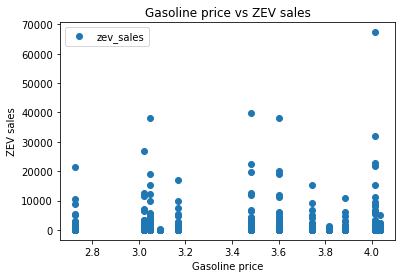

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_merged.plot(x = 'gasoline_price', y='zev_sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Gasoline price vs ZEV sales')  
plt.xlabel('Gasoline price')  
plt.ylabel('ZEV sales')  
plt.show()

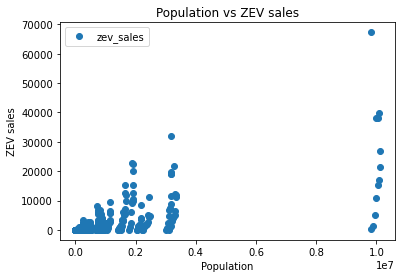

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_merged.plot(x = 'population', y='zev_sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Population vs ZEV sales')  
plt.xlabel('Population')  
plt.ylabel('ZEV sales')  
plt.show()

### Hypothesis: the population increases, ZEV sales will increase.

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df_merged['population'].values.reshape(-1,1)
y = df_merged['zev_sales'].values.reshape(-1,1)

In [27]:
x

array([[ 1512986],
       [   37886],
       [ 1052540],
       [  932039],
       [  135009],
       [   64735],
       [ 9823246],
       [  252904],
       [  416373],
       [  136759],
       [ 3015171],
       [  350021],
       [ 2201576],
       [ 1421383],
       [   55516],
       [ 2040848],
       [ 3103212],
       [  805505],
       [  687127],
       [  719699],
       [  424231],
       [ 1786040],
       [  263147],
       [  484755],
       [  825097],
       [ 1530915],
       [   37543],
       [  219975],
       [   45160],
       [ 1065440],
       [   28443],
       [  180936],
       [  939406],
       [  135243],
       [  175786],
       [  847970],
       [  151868],
       [   64251],
       [   34246],
       [ 9876482],
       [  151675],
       [  255376],
       [   18170],
       [   87334],
       [  259297],
       [  420456],
       [  137691],
       [   98701],
       [ 3049271],
       [  356328],
       [ 2234070],
       [ 1433730],
       [   5

In [28]:
y

array([[   13],
       [    1],
       [    9],
       [    2],
       [    1],
       [    1],
       [  339],
       [   14],
       [    2],
       [    3],
       [   37],
       [    3],
       [    5],
       [    3],
       [    1],
       [    1],
       [   28],
       [   20],
       [    1],
       [   40],
       [    7],
       [   83],
       [    6],
       [    7],
       [   25],
       [  452],
       [    6],
       [   10],
       [    4],
       [  211],
       [    1],
       [   29],
       [   37],
       [   10],
       [    1],
       [   29],
       [    3],
       [    3],
       [    1],
       [ 1465],
       [   10],
       [  129],
       [    2],
       [    4],
       [    3],
       [   34],
       [   31],
       [    4],
       [  537],
       [   46],
       [  131],
       [  114],
       [    5],
       [   88],
       [ 1057],
       [  183],
       [   27],
       [   41],
       [  354],
       [   99],
       [ 1000],
       [   63],
       [

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [30]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [31]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

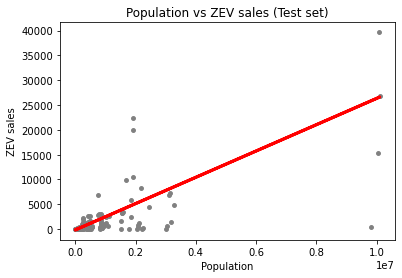

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Population vs ZEV sales (Test set)')
plot_test.xlabel('Population')
plot_test.ylabel('ZEV sales')
plot_test.show()

It looks like the regression line doesn't fit the spots very well, as there are many spots far away the line. Besides, there is an outlier making a empty space on the plot.

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00264868]]
Mean squared error:  10696625.036729567
R2 score:  0.4513700429851505


In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,55,-7.683231
1,5,-111.405627
2,2916,2079.957775
3,7,-87.103968
4,1468,527.149279
5,438,2034.585849
6,3406,4040.605064
7,706,2249.449600
8,77,70.346947
9,140,10.015264


According to the model summary statistics, the positive slope represents positive relationship between the dependant variable and independant variable. The MSE is really huge means the regression model doesn't fit the data set at all. Also, R2 is 0.45 that tells the same opinion. After that, compare actual values and predicted values manually, they are all having big differences. So, I can confirm the regression model doesn't fit the data set at all.

##### Compare how the regression fits the training set

In [37]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00264868]]
Mean squared error:  14188297.02716332
R2 score:  0.5199516277222822


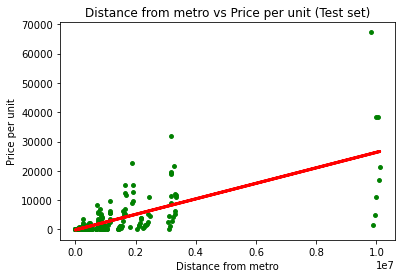

In [40]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

After reviewing the model summary statistics, both MSE and R2 tell the model don't fit the training well. 

### EV chargers vs ZEV Sales linear analysis

In [45]:
# Import datasets
path=r'/Users/elvachen/Documents/DA Learning/Immersion-Exercise/6/2original data'
df_charger=pd.read_csv(os.path.join(path,'ev_chargers.csv'),index_col = False)

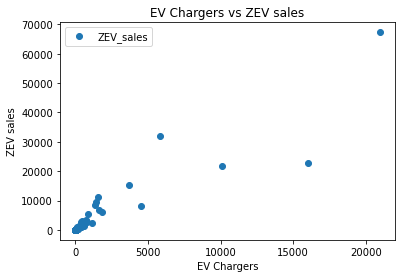

In [59]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_charger.plot(x = 'total', y='ZEV_sales',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('EV Chargers vs ZEV sales')  
plt.xlabel('EV Chargers')  
plt.ylabel('ZEV sales')  
plt.show()

In [60]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df_charger['total'].values.reshape(-1,1)
y = df_charger['ZEV_sales'].values.reshape(-1,1)

In [61]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [62]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

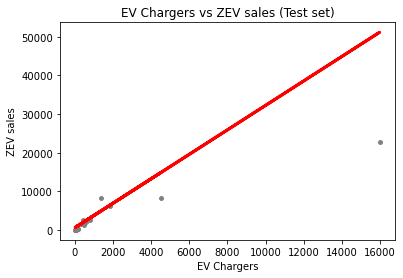

In [65]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EV Chargers vs ZEV sales (Test set)')
plot_test.xlabel('EV Chargers')
plot_test.ylabel('ZEV sales')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [67]:
# Print the model summary statistics. This is where to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.16291645]]
Mean squared error:  48081022.72286493
R2 score:  -0.606955476746825
